In [1]:
from solarmach import SolarMACH, print_body_list

In [2]:
# optional: get list of available bodies/spacecraft
print(print_body_list().index)

Index(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'L1', 'STEREO B',
       'STEREO A', 'SOHO', 'Solar Orbiter', 'PSP', 'BepiColombo', 'MAVEN',
       'Mars Express', 'MESSENGER', 'Juno', 'Cassini', 'Rosetta', 'Pioneer10',
       'Pioneer11', 'Ulysses', 'Voyager1', 'Voyager2'],
      dtype='object', name='Key')


In [8]:
# necessary options
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Venus']
vsw_list = [400, 400, 400, 400, 400, 400]   # position-sensitive solar wind speed per body in body_list
date = '2021-4-17 12:00:00'

# optional parameters
reference_long = 273                             # Carrington longitude of reference (None to omit)
reference_lat = 0                                # Carrington latitude of reference (None to omit)
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = True                        # plot straight line between Sun and body
show_earth_centered_coord = False                # display Earth-aligned coordinate system
reference_vsw = 400                              # define solar wind speed at reference
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker
filename = 'Solar-MACH_'+date.replace(' ', '_')  # define filename of output figure

In [9]:
# optional
# if input coordinates for reference are Stonyhurst, convert them to Carrington for further use
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
reference_long = 2                               # Stonyhurst longitude of reference (None to omit)
reference_lat = 26                               # Stonyhurst latitude of reference (None to omit)
coord = SkyCoord(reference_long*u.deg, reference_lat*u.deg, frame=frames.HeliographicStonyhurst, obstime=date)
coord = coord.transform_to(frames.HeliographicCarrington(observer='Sun'))
reference_long = coord.lon.value                 # Carrington longitude of reference
reference_lat = coord.lat.value                  # Carrington latitude of reference

In [10]:
# initialize
sm = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat)

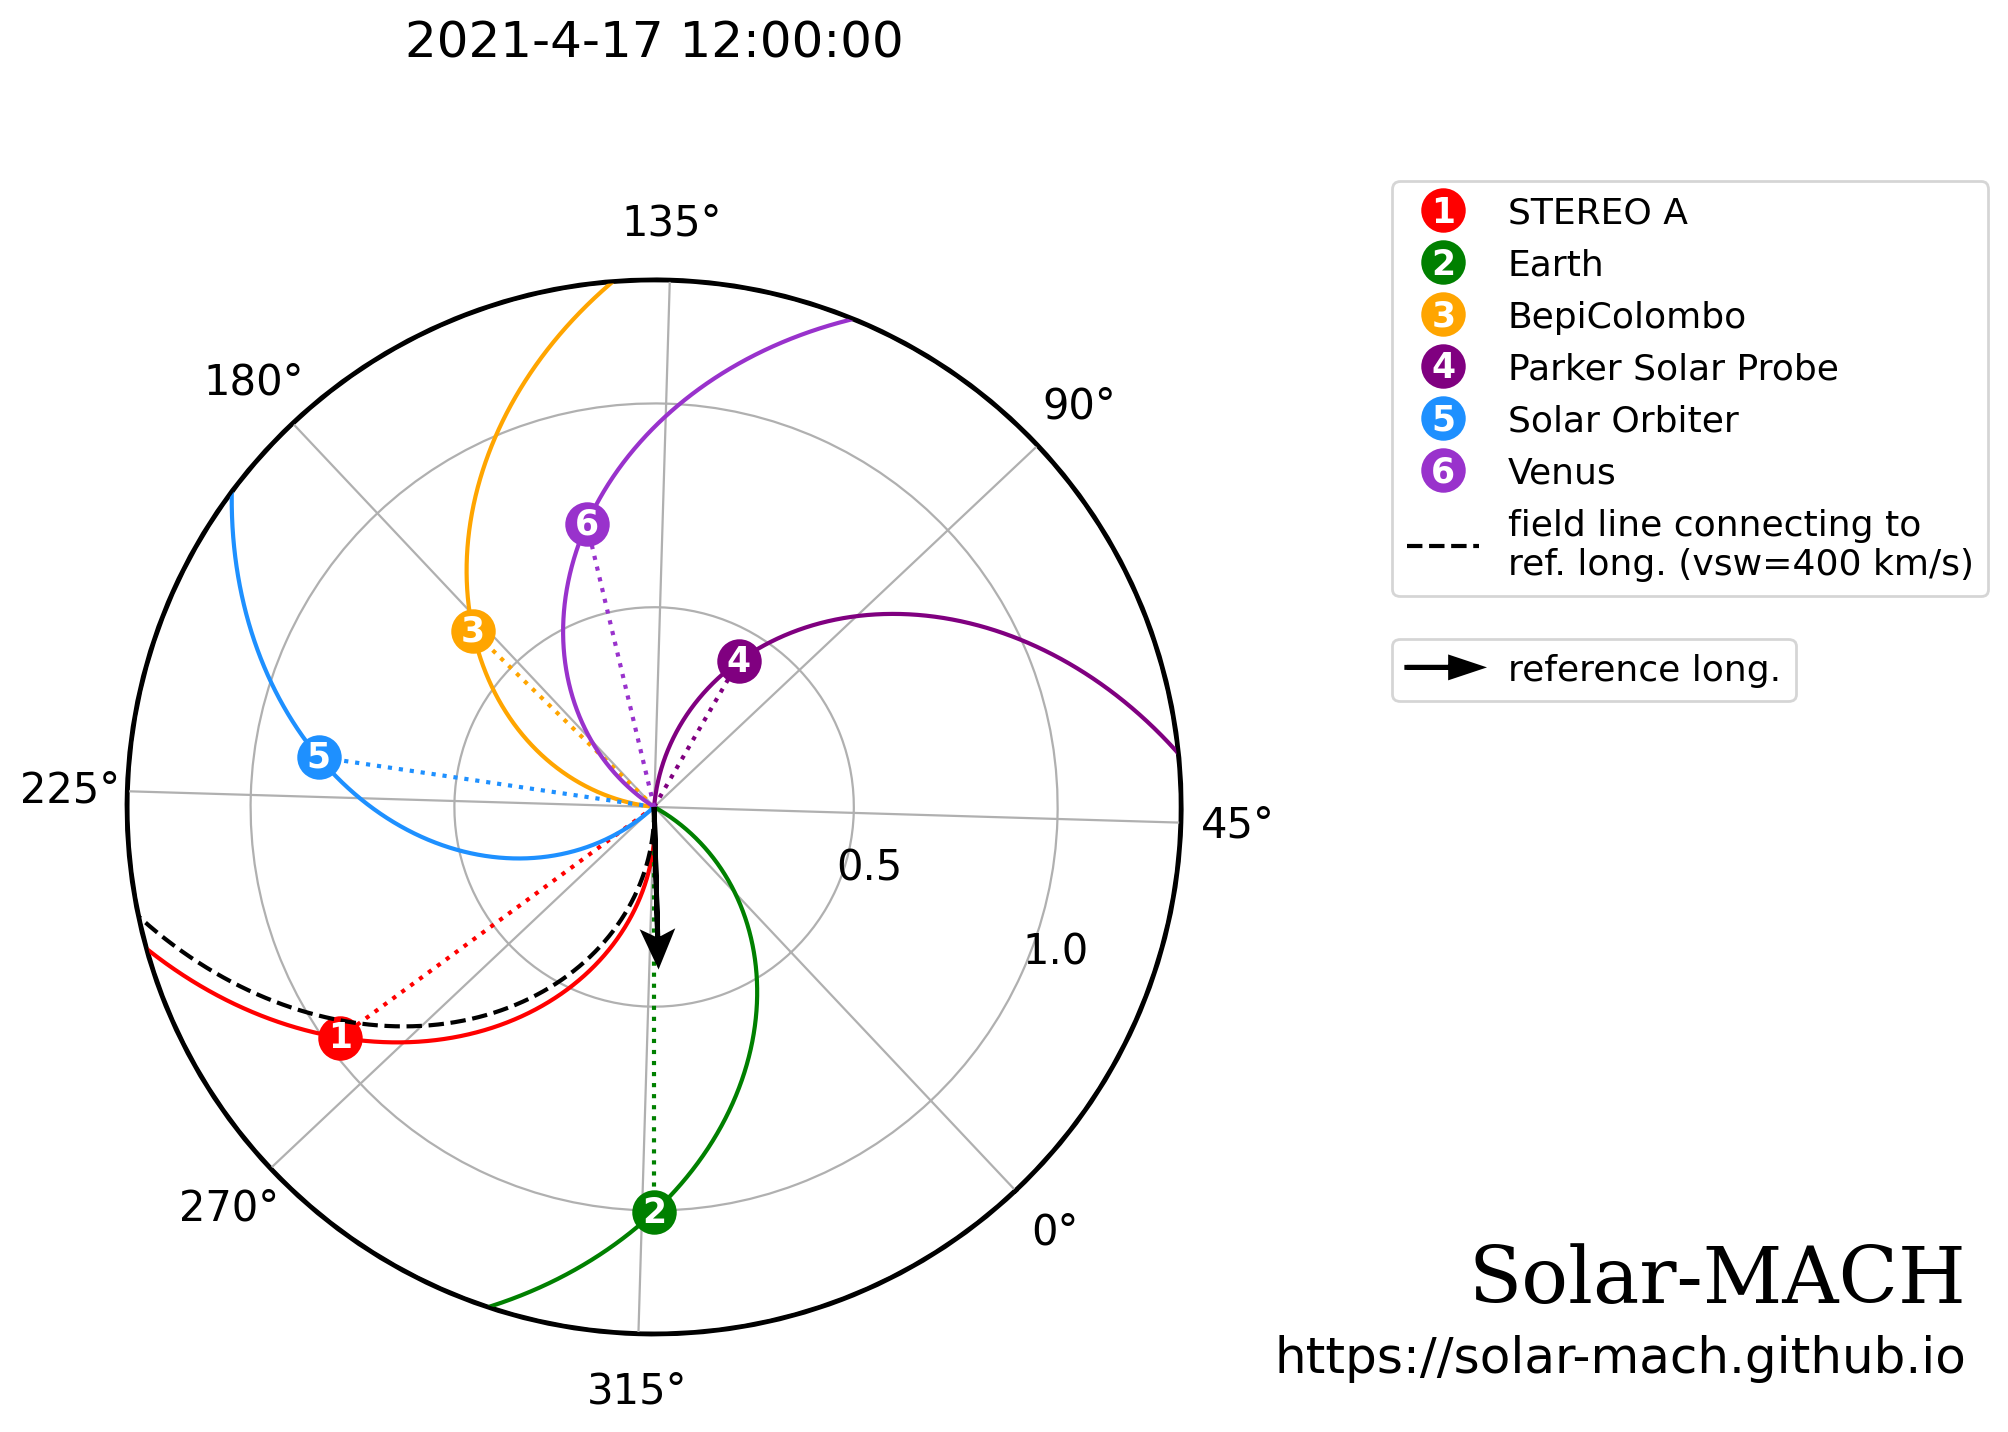

In [11]:
# make plot
sm.plot(plot_spirals=plot_spirals, plot_sun_body_line=plot_sun_body_line, 
        show_earth_centered_coord=show_earth_centered_coord,reference_vsw=reference_vsw, 
        transparent=transparent, numbered_markers=numbered_markers)

In [7]:
# obtain data as Pandas DataFrame
display(sm.coord_table)

,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,STEREO-A,58.4,-6.0,1.0,-75.5,-0.4,400,117.8,-77.5,-18.1,-32.0
1,Earth,133.9,-5.6,1.0,0.0,0.0,400,195.5,-2.0,59.6,-31.6
2,BepiColombo,133.3,-5.8,1.0,-0.5,-0.2,400,195.2,-2.5,59.3,-31.8
3,PSP,269.9,3.8,0.9,136.1,9.5,400,322.5,134.1,-173.3,-22.2
4,Solar Orbiter,128.8,-4.5,0.8,-5.1,1.2,400,180.0,-7.1,44.2,-30.5
5,Venus,101.6,-3.8,0.7,-32.3,1.8,400,145.8,-34.3,9.9,-29.8


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb31f8e3-0d98-459c-be0d-0c93f66f7c4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>